In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uncover/UNCOVER_v4/UNCOVER/hackathon_file_readme.txt
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/coronadatascraper/coronadatascraper-timeseries.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/OpenTable/restaurant-performance.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/howsmyflattening/howsmyflattening/ontario-testing-data.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/howsmyflattening/howsmyflattening/ontario-icu-capacity.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/howsmyflattening/howsmyflattening/canada-testing-data.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/covid_tracker_canada/covid-19-tracker-canada.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/regional_sources/the_belgian_institute_for_health/dataset-of-confirmed-cases-by-date-and-municipality.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/regional_sources/government_of_mexico/covid19-mexico-daily-cases.csv
/kaggle/input/uncover/UNCOVER_v4/UNCOVER/regional_sources/spain_ministry_of_health/covid19-spain-cases.csv
/kaggle/in

In [49]:
open_database_of_healthcare_facilities = pd.read_csv('/kaggle/input/canada-statics/open-database-of-healthcare-facilities.csv', encoding="windows-1252")
proximity_measures_database = pd.read_csv('/kaggle/input/canada-statics/proximity-measures-database.csv', encoding="windows-1252")
# Toplam COVID-19 testleri
total_covid_tests = pd.read_csv('/kaggle/input/uncover/RDSC-07-30-Update/RDSC-07-30-Update/HDE/total-covid-19-tests-performed-by-country.csv')

# Hükümet önlemleri
government_measures = pd.read_csv('/kaggle/input/uncover/RDSC-07-30-Update/RDSC-07-30-Update/HDE/acaps-covid-19-government-measures-dataset.csv')

# Okul kapanışları
school_closures = pd.read_csv('/kaggle/input/uncover/RDSC-07-30-Update/RDSC-07-30-Update/HDE/global-school-closures-covid-19.csv')

# New York eyaleti test verileri
new_york_testing = pd.read_csv('/kaggle/input/uncover/RDSC-07-30-Update/RDSC-07-30-Update/ny_dept_of_health/new-york-state-statewide-covid-19-testing.csv')

# Healthcare facilities verisi
healthcare_facilities = pd.read_csv('/kaggle/input/canada-statics/open-database-of-healthcare-facilities.csv', encoding="windows-1252")
#CANADA İÇİN 
# Toplam COVID-19 test sayılarının zaman serisi verileri
cumulative_testing = pd.read_csv('/kaggle/input/uncover/RDSC-07-30-Update/RDSC-07-30-Update/covid_19_canada_open_data_working_group/time-series-of-cumulative-testing.csv')

# COVID-19'dan iyileşen kişi sayısının zaman serisi verileri
cumulative_recovered = pd.read_csv('/kaggle/input/uncover/RDSC-07-30-Update/RDSC-07-30-Update/covid_19_canada_open_data_working_group/time-series-of-cumulative-recovered.csv')

# Kamuya açık COVID-19 vaka verileri
public_covid_cases = pd.read_csv('/kaggle/input/uncover/RDSC-07-30-Update/RDSC-07-30-Update/covid_19_canada_open_data_working_group/public-covid-19-cases-canada.csv')
#Ölümler
confirmed_covid_deaths = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/USAFacts/confirmed-covid-19-deaths-in-us-by-state-and-county.csv')

In [50]:
cumulative_testing.head()

,Unnamed: 0,date_testing,province,cumulative_testing,testing_info
0,0,2020-07-28,Alberta,659242,NaN
1,1,2020-07-27,Alberta,651335,NaN
2,2,2020-07-26,Alberta,640718,NaN
3,3,2020-07-25,Alberta,630870,NaN
4,4,2020-07-24,Alberta,623422,NaN


In [51]:
public_covid_cases.head()

,Unnamed: 0,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
1,1,NaN,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
2,2,NaN,1,40-49,Male,Not Reported,BC,Canada,2020-01-28,2020-01-26,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...
3,3,NaN,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
4,4,NaN,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04,2020-02-02,f,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...


In [52]:

# Health region sütununa göre gruplama yap ve her bir sağlık bölgesi için adetleri hesapla
health_region_counts = public_covid_cases['health_region'].value_counts()

# Sonuçları görüntüle
print(health_region_counts)


health_region
Montréal                   28608
Toronto                    15338
Montérégie                  8699
Peel                        7052
Calgary                     6407
                           ...  
Labrador-Grenfell              6
NWT                            5
Western                        4
Zone 7 (Miramichi area)        2
Zone 6 (Bathurst area)         1
Name: count, Length: 86, dtype: int64


In [53]:
cumulative_recovered.head()

,Unnamed: 0,date_recovered,province,cumulative_recovered
0,0,2020-07-28,Alberta,8886.0
1,1,2020-07-27,Alberta,8774.0
2,2,2020-07-26,Alberta,8567.0
3,3,2020-07-25,Alberta,8567.0
4,4,2020-07-24,Alberta,8567.0


In [54]:
# Sunburst grafiği oluşturma
fig = px.sunburst(cumulative_testing, path=['province'], values='cumulative_testing')
fig.update_layout(width=900, height=800, title='Cumulative Testing by Province', title_x=0.5)
fig.show()

In [55]:
# Province sütununa göre gruplama yap ve her bir provins için adetleri hesapla
province_counts = cumulative_recovered['province'].value_counts()

# Sonuçları görüntüle
print(province_counts)


province
Alberta          168
BC               168
Manitoba         168
New Brunswick    168
NL               168
Nova Scotia      168
Ontario          168
PEI              168
Quebec           168
Saskatchewan     168
NWT              168
Nunavut          168
Yukon            168
Repatriated      168
Name: count, dtype: int64


In [56]:
# province sütununa göre iki veri çerçevesini birleştir
merged_data = cumulative_testing.merge(public_covid_cases, on='province', suffixes=('_testing', '_cases'))

# Sonuçları görüntüle
print(merged_data)


          Unnamed: 0_testing date_testing province  cumulative_testing  \
0                          0   2020-07-28  Alberta              659242   
1                          0   2020-07-28  Alberta              659242   
2                          0   2020-07-28  Alberta              659242   
3                          0   2020-07-28  Alberta              659242   
4                          0   2020-07-28  Alberta              659242   
...                      ...          ...      ...                 ...   
15890507                1767   2020-03-15    Yukon                   0   
15890508                1767   2020-03-15    Yukon                   0   
15890509                1767   2020-03-15    Yukon                   0   
15890510                1767   2020-03-15    Yukon                   0   
15890511                1767   2020-03-15    Yukon                   0   

         testing_info  Unnamed: 0_cases  case_id  provincial_case_id  \
0                 NaN                46

In [57]:
# NaN olan province değerlerini çıkar
cleaned_data = merged_data.dropna(subset=['province'])

# Sonuçları görüntüle
print(cleaned_data)


          Unnamed: 0_testing date_testing province  cumulative_testing  \
0                          0   2020-07-28  Alberta              659242   
1                          0   2020-07-28  Alberta              659242   
2                          0   2020-07-28  Alberta              659242   
3                          0   2020-07-28  Alberta              659242   
4                          0   2020-07-28  Alberta              659242   
...                      ...          ...      ...                 ...   
15890507                1767   2020-03-15    Yukon                   0   
15890508                1767   2020-03-15    Yukon                   0   
15890509                1767   2020-03-15    Yukon                   0   
15890510                1767   2020-03-15    Yukon                   0   
15890511                1767   2020-03-15    Yukon                   0   

         testing_info  Unnamed: 0_cases  case_id  provincial_case_id  \
0                 NaN                46

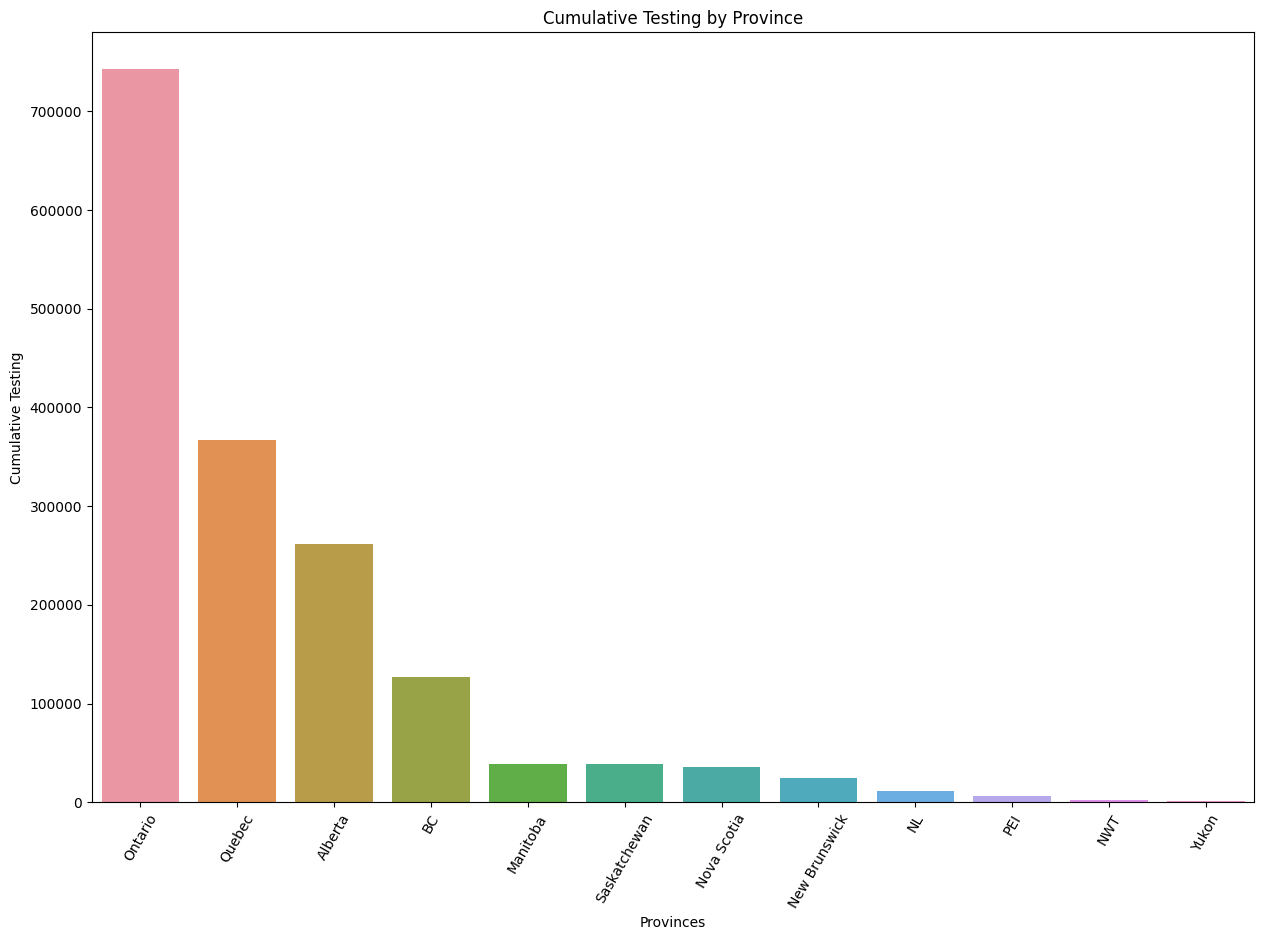

In [58]:


# province sütununa göre iki veri çerçevesini birleştir
merged_data = cumulative_testing.merge(public_covid_cases, on='province', suffixes=('_testing', '_cases'))

# NaN olan province değerlerini çıkar
cleaned_data = merged_data.dropna(subset=['province'])

# İlk olarak, merged_data içindeki cumulative_testing oranlarını güncelle
cleaned_data['cumulative_testing'] = cleaned_data['cumulative_testing'].replace(['-'], 0.0).astype(float)

# Eşsiz eyalet/provinceleri al
province_list = list(cleaned_data['province'].unique())
province_poverty_ratio = []

# Her bir eyalet/province için ortalama cumulative_testing oranını hesapla
for province in province_list:
    x = cleaned_data[cleaned_data['province'] == province]
    if len(x) > 0:  # Boş kontrolü
        province_poverty_rate = sum(x.cumulative_testing) / len(x)
        province_poverty_ratio.append(province_poverty_rate)

# Yeni bir DataFrame oluştur
data = pd.DataFrame({'province_list': province_list, 'province_poverty_ratio': province_poverty_ratio})

# Yoksulluk oranına göre sıralama
new_index = data['province_poverty_ratio'].sort_values(ascending=False).index.values
sorted_data = data.reindex(new_index)

# Görselleştirme
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_data['province_list'], y=sorted_data['province_poverty_ratio'])
plt.xticks(rotation=60)
plt.xlabel('Provinces')
plt.ylabel('Cumulative Testing')
plt.title('Cumulative Testing by Province')
plt.show()



In [59]:
confirmed_covid_deaths.head()

,county_fips,county_name,state_name,state_fips,date,deaths,lat,long,geometry
0,0,Statewide Unallocated,AL,1,2020-01-22,0,NaN,NaN,NaN
1,0,Statewide Unallocated,AL,1,2020-01-23,0,NaN,NaN,NaN
2,0,Statewide Unallocated,AL,1,2020-01-24,0,NaN,NaN,NaN
3,0,Statewide Unallocated,AL,1,2020-01-25,0,NaN,NaN,NaN
4,0,Statewide Unallocated,AL,1,2020-01-26,0,NaN,NaN,NaN


In [60]:
# county_name sütununu al ve benzersiz değerlerini listele
county_names = confirmed_covid_deaths['county_name'].unique()

# Sonuçları yazdır
print(county_names)

['Statewide Unallocated' 'Autauga County' 'Baldwin County' ...
 'Uinta County' 'Washakie County' 'Weston County']


In [61]:
top_deaths = confirmed_covid_deaths.sort_values(by='deaths', ascending=False).head(10)
print(top_deaths)

        county_fips    county_name state_name  state_fips        date  deaths  \
224552        36047   Kings County         NY          36  2020-05-19    6353   
224551        36047   Kings County         NY          36  2020-05-18    6330   
224550        36047   Kings County         NY          36  2020-05-17    6304   
224549        36047   Kings County         NY          36  2020-05-16    6278   
224548        36047   Kings County         NY          36  2020-05-15    6246   
224547        36047   Kings County         NY          36  2020-05-14    6194   
224546        36047   Kings County         NY          36  2020-05-13    6127   
224545        36047   Kings County         NY          36  2020-05-12    6077   
224544        36047   Kings County         NY          36  2020-05-11    6017   
226575        36081  Queens County         NY          36  2020-05-19    5983   

              lat       long                          geometry  
224552  40.636182 -73.949356   POINT (-73.9

In [62]:
# "state_name" veya "county_name" Canada olanları filtrele
canada_deaths = confirmed_covid_deaths[
    (confirmed_covid_deaths['state_name'] == 'Canada') |
    (confirmed_covid_deaths['county_name'].str.contains('Canada', na=False))
]

# Sonuçları görüntüle
print(canada_deaths)


Empty DataFrame
Columns: [county_fips, county_name, state_name, state_fips, date, deaths, lat, long, geometry]
Index: []


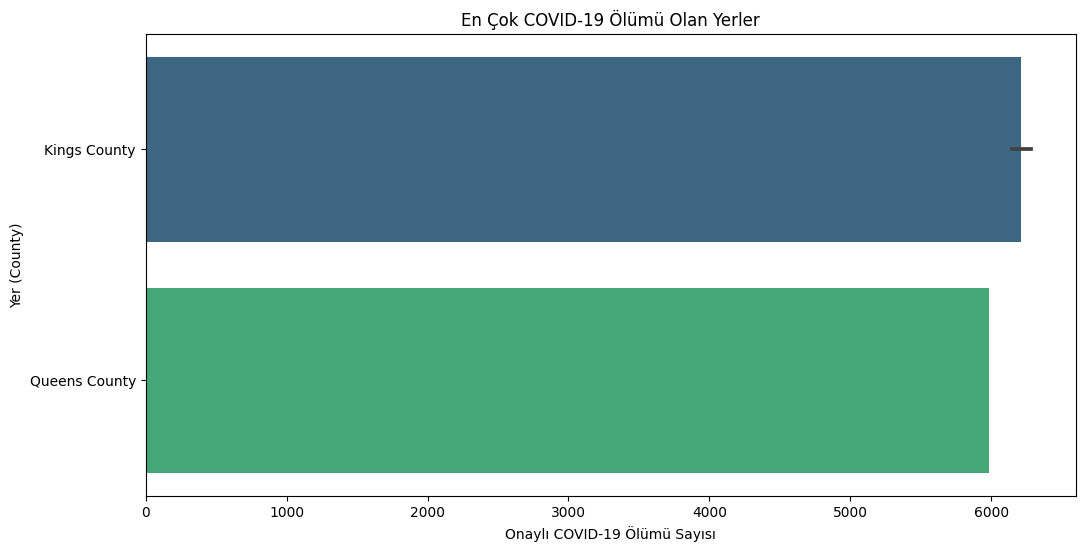

In [63]:
# Bar grafiği için boyut ayarlayın
plt.figure(figsize=(12, 6))

# Seaborn barplot ile grafiği oluşturun
sns.barplot(x='deaths', y='county_name', data=top_deaths, palette='viridis')

# Başlık ve etiketler ekleyin
plt.title('En Çok COVID-19 Ölümü Olan Yerler')
plt.xlabel('Onaylı COVID-19 Ölümü Sayısı')
plt.ylabel('Yer (County)')

# Grafiği göster
plt.show()


In [ ]:
# Her iki veri çerçevesini 'date' ve 'date_testing' sütunlarına göre birleştir
common_dates = pd.merge(merged_data[['date_testing']], 
                         confirmed_covid_deaths[['date']], 
                         left_on='date_testing', 
                         right_on='date', 
                         how='inner')

# Ortak tarihlerin sayısını bul
matching_count = common_dates.shape[0]

print(f"Eşleşen kayıt sayısı: {matching_count}")

